In [2]:
import pandas as pd 
import numpy as np
import missingno as msno
%matplotlib inline
file = '/home/vagrant/practicas/heart.csv'

In [111]:
df= pd.read_csv(file)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [7]:
df_copy = df.copy() 

In [8]:
df_copy.shape

(303, 14)

In [9]:
df_copy.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [10]:
list(df_copy.columns)

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [11]:
l = []
bandera = np.NAN
for column in df_copy.columns:
    if df_copy[column].dtype == np.int64:
        bandera = 'entero'
    elif df_copy[column].dtype == np.float64:
        bandera = 'flotante'
    else:
        bandera = 'otro'
        
    try:
        df_copy[column] =df_copy[column].astype('int64')
    except:
        l.append(column)
        
    print('COLUMNA: ', column)
    print('TIPO: ', bandera)
    print('NUNIQUE: ', df_copy[column].nunique())
    print('UNIQUE: ', df_copy[column].unique())
    print('VALUE COUNTS ', df_copy[column].value_counts())
    print('\n')

COLUMNA:  age
TIPO:  entero
NUNIQUE:  41
UNIQUE:  [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
VALUE COUNTS  58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64


COLUMNA:  sex
TIPO:  entero
NUNIQUE:  2
UNIQUE:  [1 0]
VALUE COUNTS  1    207
0     96
Name: sex, dtype: int64


COLUMNA:  cp
TIPO:  entero
NUNIQUE:  4
UNIQUE:  [3 2 1 0]
VALUE COUNTS  0    143
2     87
1     50
3     23
Name: cp, dtype: int64


COLUMNA:  trestbps
TIPO:  entero
NUNIQUE:  49
UNIQUE:  [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 

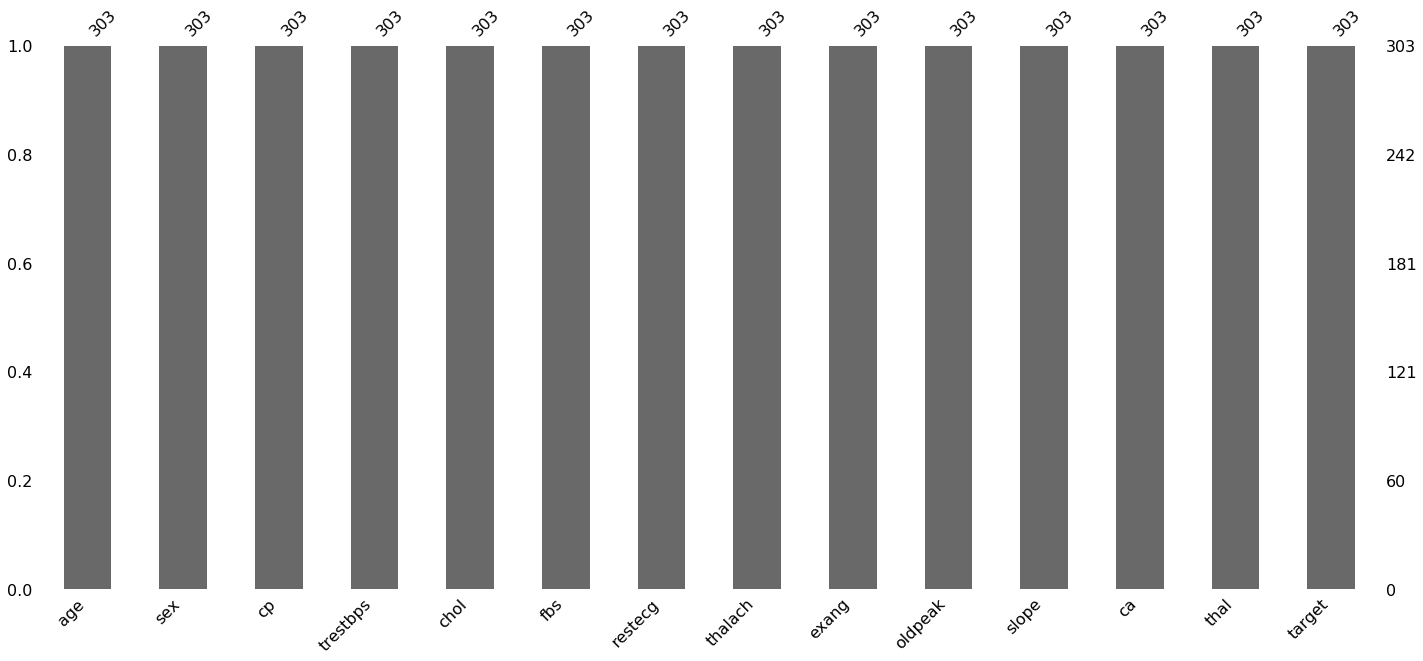

In [12]:
msno.bar(df_copy)

In [112]:
df[df.duplicated(subset=None)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [113]:
df.drop([164],axis=0,inplace=True)

In [114]:
features=[x for x in df.columns if x!="target"]
target=["target"]

In [29]:
features

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [115]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_sc = pd.DataFrame(scaler.fit_transform(df[features]),
                 columns=features)
df_sc.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667


In [133]:
print(df_sc["age"]).head()

0      0.708333
1      0.166667
2      0.250000
3      0.562500
4      0.583333
         ...   
297    0.583333
298    0.333333
299    0.812500
300    0.583333
301    0.583333
Name: age, Length: 302, dtype: float64


AttributeError: 'NoneType' object has no attribute 'head'

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

In [116]:
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(df[features]),
                     columns=features)
df_pca.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-12.502590,2.804391,15.020520,6.823929,-0.048097,2.676496,0.040754,1.084705,-0.923998,0.470904,0.730941,-0.290420,0.515497
1,2.569685,-39.921301,1.040448,-10.690527,2.636436,2.391334,-0.333098,0.515739,0.194252,0.574497,0.405460,-0.425935,-0.152417
2,-43.115097,-23.808983,1.917025,-7.910613,0.456481,0.232424,-0.396492,0.518500,-0.202070,-0.617531,-0.915283,0.217832,0.079260
3,-11.122433,-28.586565,-6.878223,8.240605,0.088890,0.073551,-0.680933,0.066032,0.426880,-0.406692,0.376528,-0.246157,-0.046533
4,106.764030,-15.731739,-14.878600,3.286245,-0.236132,-0.588361,-1.181716,0.357710,0.649972,-0.149679,0.156218,0.743555,-0.052921


In [117]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([7.46933484e-01, 1.50672524e-01, 8.49522692e-02, 1.61968964e-02,
       3.85721017e-04, 2.80717650e-04, 2.18383288e-04, 1.00270817e-04,
       7.74906534e-05, 5.90506856e-05, 5.05588512e-05, 4.11936290e-05,
       3.14394011e-05])

In [118]:
df_pca['target'] = df[target]
df_pca.columns = ['PC1', 'PC2','PC3','PC4',"PC5","PC6","PC7","PC8","PC9","PC10","PC11","PC12","PC13",'target']
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,target
0,-12.502590,2.804391,15.020520,6.823929,-0.048097,2.676496,0.040754,1.084705,-0.923998,0.470904,0.730941,-0.290420,0.515497,1.0
1,2.569685,-39.921301,1.040448,-10.690527,2.636436,2.391334,-0.333098,0.515739,0.194252,0.574497,0.405460,-0.425935,-0.152417,1.0
2,-43.115097,-23.808983,1.917025,-7.910613,0.456481,0.232424,-0.396492,0.518500,-0.202070,-0.617531,-0.915283,0.217832,0.079260,1.0
3,-11.122433,-28.586565,-6.878223,8.240605,0.088890,0.073551,-0.680933,0.066032,0.426880,-0.406692,0.376528,-0.246157,-0.046533,1.0
4,106.764030,-15.731739,-14.878600,3.286245,-0.236132,-0.588361,-1.181716,0.357710,0.649972,-0.149679,0.156218,0.743555,-0.052921,1.0


In [68]:
prin=["pc"+ str(x) for x in range(1,14)]

In [97]:
df_pca["target"] = df[target]
df_pca.columns = [prin + ["target"] ]
df_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,target
0,-12.502590,2.804391,15.020520,6.823929,-0.048097,2.676496,0.040754,1.084705,-0.923998,0.470904,0.730941,-0.290420,0.515497,B
1,2.569685,-39.921301,1.040448,-10.690527,2.636436,2.391334,-0.333098,0.515739,0.194252,0.574497,0.405460,-0.425935,-0.152417,B
2,-43.115097,-23.808983,1.917025,-7.910613,0.456481,0.232424,-0.396492,0.518500,-0.202070,-0.617531,-0.915283,0.217832,0.079260,B
3,-11.122433,-28.586565,-6.878223,8.240605,0.088890,0.073551,-0.680933,0.066032,0.426880,-0.406692,0.376528,-0.246157,-0.046533,B
4,106.764030,-15.731739,-14.878600,3.286245,-0.236132,-0.588361,-1.181716,0.357710,0.649972,-0.149679,0.156218,0.743555,-0.052921,B


TypeError: only integer scalar arrays can be converted to a scalar index

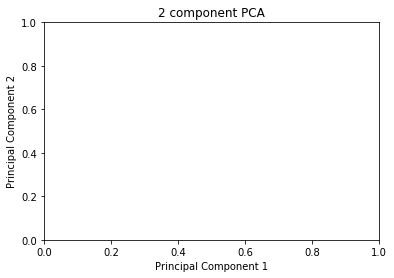

In [102]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 
targets = ["A", "B"]
colors = ['r', 'g']

for target, color in zip(targets,colors):
    indicesToKeep = df_pca['target'] == target
    ax.scatter(df_pca.loc[indicesToKeep, 'pc1']
    , df_pca.loc[indicesToKeep, 'pc2']
    , c = color
    , s = 50)
ax.legend(targets)
ax.grid()

In [88]:
df["target"].replace([0,1],["A","B"],inplace=True)

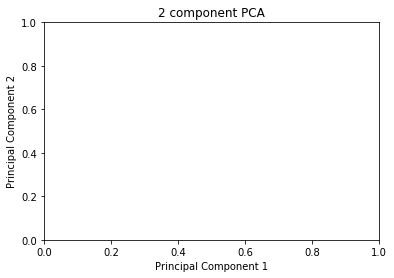

In [103]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 
targets = ["A", "B"]
colors = ['r', 'g']



In [108]:
import seaborn as sns

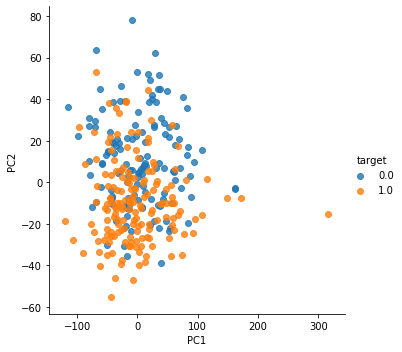

In [119]:
sns.lmplot("PC1","PC2",data=df_pca,fit_reg=False,hue="target")

In [120]:
from sklearn.mixture import GaussianMixture

In [123]:
xs=[x for x in df_pca.columns if x.startswith("PC")]

In [124]:
Xs=df_pca[xs]

In [128]:
gm = GaussianMixture(n_components=5)
gm.fit(Xs)
Xs["clus"]= gm.predict(Xs)
Xs.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,clus
0,-12.502590,2.804391,15.020520,6.823929,-0.048097,2.676496,0.040754,1.084705,-0.923998,0.470904,0.730941,-0.290420,0.515497,3
1,2.569685,-39.921301,1.040448,-10.690527,2.636436,2.391334,-0.333098,0.515739,0.194252,0.574497,0.405460,-0.425935,-0.152417,2
2,-43.115097,-23.808983,1.917025,-7.910613,0.456481,0.232424,-0.396492,0.518500,-0.202070,-0.617531,-0.915283,0.217832,0.079260,2
3,-11.122433,-28.586565,-6.878223,8.240605,0.088890,0.073551,-0.680933,0.066032,0.426880,-0.406692,0.376528,-0.246157,-0.046533,2
4,106.764030,-15.731739,-14.878600,3.286245,-0.236132,-0.588361,-1.181716,0.357710,0.649972,-0.149679,0.156218,0.743555,-0.052921,2


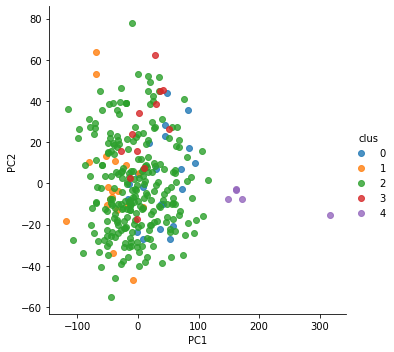

In [129]:
sns.lmplot("PC1","PC2",data=Xs,fit_reg=False,hue="clus")